# Hands on introduction to KS Test and t-Test

###### Author and Instructor: __Matei Iordanescu__
Concepts:

 1) Hypothesis Testing
    - Concept 1: Descriptive vs Inferential Statistics
    - Concept 2: What is Hypothesis Testing?
    - Concept 3: What is a p-value?
 2) The t-Test – Comparing Means
    - Concept 1: When and why do we use a t-test?
 3) The Kolmogorov-Smirnov (KS) Test
    - Concept 1: When do we use the KS test?
 4) Interactive Panel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
from scipy.stats import ttest_ind, ks_2samp, t

## 1) Hypothesis Testing Basics

### Concept 1: Descriptive vs Inferential Statistics
In statistics, there are two main ways to understand data: descriptive and inferential. Descriptive statistics summarize the data you already have using measures like the mean, median, and standard deviation. Inferential statistics go further by using a sample to make estimates or predictions about a larger population. For example, if we only survey 15 students out of a class of 100, we might still want to estimate the average score for the whole class.

In this first example, we will create test score data for an entire class. We will calculate the mean and median, and then visualize the score distribution. This is an example of descriptive statistics because we are analyzing the full dataset without making predictions beyond it.

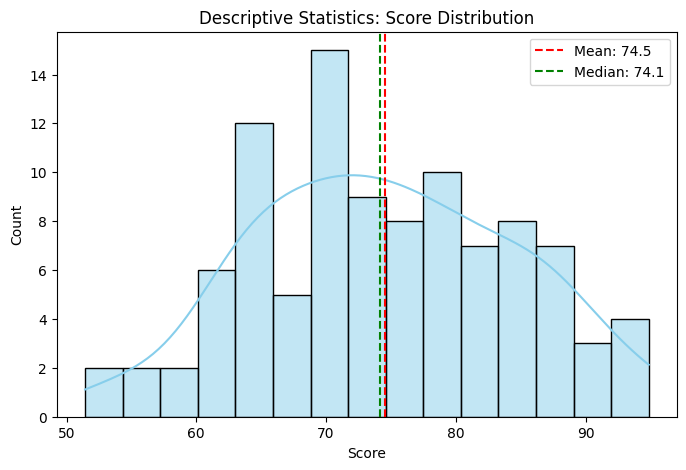

In [2]:
scores = np.random.normal(loc=75, scale=10, size=100)

# Calculate summary statistics
mean_score = np.mean(scores)
median_score = np.median(scores)

# Plot the distribution with mean and median
plt.figure(figsize=(8, 5))
sns.histplot(scores, bins=15, kde=True, color="skyblue")
plt.axvline(mean_score, color="red", linestyle="--", label=f"Mean: {mean_score:.1f}")
plt.axvline(median_score, color="green", linestyle="--", label=f"Median: {median_score:.1f}")
plt.title("Descriptive Statistics: Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend()
plt.show()

Now let us imagine that we do not have access to all 100 scores. Instead, we randomly select a sample of 15 students. Using just this sample, we will try to estimate the average score for the entire class. We will calculate the sample mean and then compute a 95 percent confidence interval to show how much uncertainty there is in our estimate. This example illustrates inferential statistics because we are using a small portion of the data to make a prediction about the larger group.

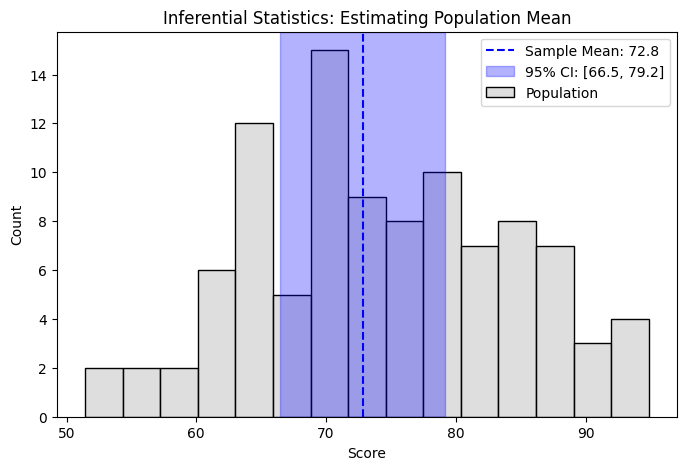

In [3]:
sample = np.random.choice(scores, size=15, replace=False)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# Compute 95% confidence interval for the sample mean
n = len(sample)
t_crit = t.ppf(0.975, df=n-1)
margin = t_crit * (sample_std / np.sqrt(n))
ci_low = sample_mean - margin
ci_high = sample_mean + margin

# Plot the sample mean and confidence interval on top of the population histogram
plt.figure(figsize=(8, 5))
sns.histplot(scores, bins=15, color="lightgray", label="Population")
plt.axvline(sample_mean, color="blue", linestyle="--", label=f"Sample Mean: {sample_mean:.1f}")
plt.axvspan(ci_low, ci_high, color="blue", alpha=0.3, label=f"95% CI: [{ci_low:.1f}, {ci_high:.1f}]")
plt.title("Inferential Statistics: Estimating Population Mean")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend()
plt.show()

### Concept 2: What is Hypothesis Testing?
Hypothesis testing is the most common way of making inferences.

We start with a default idea (called the **null hypothesis**, or H₀), and we use data to decide whether to keep it or reject it in favor of an **alternative hypothesis** (H₁).
Basically, imagine we're testing a new drug to see if it works. Since we hope the drug is effective, our alternative hypothesis says that it does work. But for safety and honesty, we also set up to accept the null hypothesis if the drug has no effect. After running the test, we look at the data. Ideally, we’d find enough evidence to reject the null hypothesis and accept the alternative. But if the data shows the drug isn’t effective, we must accept the null hypothesis and conclude that the drug does not work.

### Concept 3: What is a p-value?

A p-value tells us how likely it is to see our data (or something more extreme) if the null hypothesis (H₀) is actually true. It comes from comparing our observed result to a statistical distribution (like a t-distribution) that assumes H₀ is correct. If the p-value is small (typically less than 0.05), it means the result is unlikely under H₀, so we reject H₀ and consider the alternative hypothesis instead. If the p-value is large, the result is not surprising under H₀, so we don’t reject it. This doesn’t prove H₀ is true, it just means there isn’t enough evidence against it.

## 2) The t-Test – Comparing Means

### Concept 1: When and why do we use a t-test?
The t-test is used to determine whether the means of two independent groups are significantly different. It’s best suited for continuous, approximately normal data. For example, if two classes use different teaching methods, a t-test can show whether the difference in their average test scores is likely due to the methods or just random variation. It works by comparing the difference in means relative to the variability in the data, helping us decide if the difference is statistically significant.

#### Generate Sample Data (2 Normal Distributions)

In [4]:
group1 = np.random.normal(5, 1, 100)
group2 = np.random.normal(5.5, 1, 100)

#### Visualize the Two Groups

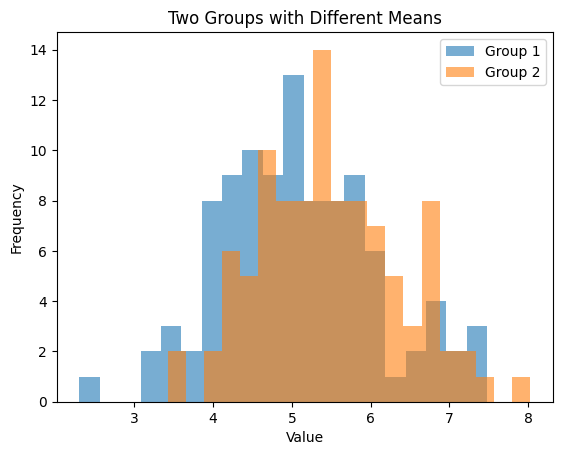

In [5]:
plt.hist(group1, bins=20, alpha=0.6, label='Group 1')
plt.hist(group2, bins=20, alpha=0.6, label='Group 2')
plt.legend()
plt.title("Two Groups with Different Means")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#### Run the t-test

In [6]:
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

T-statistic = -2.87, p-value = 0.0045


## 3) The Kolmogorov-Smirnov (KS) Test

### Concept 1: When do we use the KS test?
We use the KS test to compare **entire distributions**, not just the means.

The Kolmogorov-Smirnov test uses the statistic defined by the **maximum difference** between the cumulative distributions of two samples.

#### Visualize CDFs of Two Normal Samples

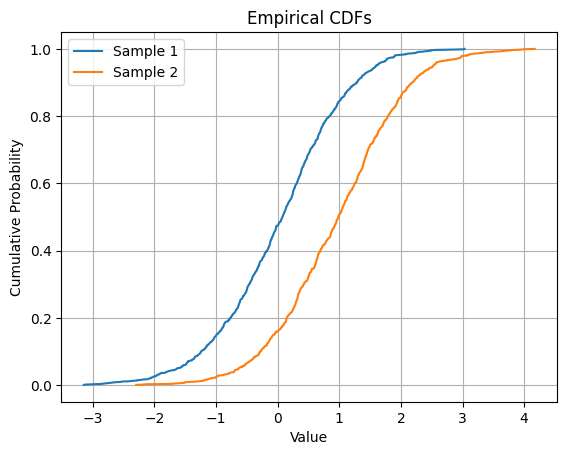

In [7]:
sample1 = np.random.normal(0, 1, 1000)
sample2 = np.random.normal(1, 1, 1000)

x1 = np.sort(sample1)
x2 = np.sort(sample2)
cdf1 = np.arange(1, len(x1)+1) / len(x1)
cdf2 = np.arange(1, len(x2)+1) / len(x2)

plt.plot(x1, cdf1, label='Sample 1')
plt.plot(x2, cdf2, label='Sample 2')
plt.title("Empirical CDFs")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.legend()
plt.show()

#### Run the KS Test

In [8]:
ks_stat, ks_p = ks_2samp(sample1, sample2)
print(f"KS Statistic = {ks_stat:.3f}, p-value = {ks_p:.4f}")

KS Statistic = 0.371, p-value = 0.0000


## Interactive Panel

### Try Adjusting the Parameters Yourself!
Use the sliders below to change the sample size, means, and standard deviations of two groups. Then compare the results using both t-test and KS test.

In [9]:
def interactive_test(mean1=0, mean2=0.5, std1=1.0, std2=1.0, size=200):
    group1 = np.random.normal(loc=mean1, scale=std1, size=size)
    group2 = np.random.normal(loc=mean2, scale=std2, size=size)

    mean_group1 = group1.mean()
    mean_group2 = group2.mean()

    plt.figure(figsize=(14, 4))

    # Histogram plot
    plt.subplot(1, 2, 1)
    plt.hist(group1, bins=30, alpha=0.6, label='Group 1', color='skyblue')
    plt.hist(group2, bins=30, alpha=0.6, label='Group 2', color='salmon')
    plt.axvline(mean_group1, color='blue', linestyle='dashed')
    plt.axvline(mean_group2, color='red', linestyle='dashed')
    plt.text(mean_group1, plt.ylim()[1]*0.9, f"Mean 1: {mean_group1:.2f}", color='blue', ha='center')
    plt.text(mean_group2, plt.ylim()[1]*0.8, f"Mean 2: {mean_group2:.2f}", color='red', ha='center')
    plt.title("Histograms")
    plt.legend()

    # Empirical CDFs
    plt.subplot(1, 2, 2)
    x1 = np.sort(group1)
    x2 = np.sort(group2)
    cdf1 = np.arange(1, len(x1)+1) / len(x1)
    cdf2 = np.arange(1, len(x2)+1) / len(x2)
    plt.plot(x1, cdf1, label="Group 1 CDF", color='blue')
    plt.plot(x2, cdf2, label="Group 2 CDF", color='red')
    plt.title("Empirical CDFs")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Statistical tests
    t_stat, t_p = ttest_ind(group1, group2)
    ks_stat, ks_p = ks_2samp(group1, group2)

    print(f"t-test:\n  T-statistic = {t_stat:.3f}, p-value = {t_p:.4f}")
    print(f"KS test:\n  KS-statistic = {ks_stat:.3f}, p-value = {ks_p:.4f}")

# Create interactive widget
widgets.interact(
    interactive_test,
    mean1=widgets.FloatSlider(value=0, min=-2, max=2, step=0.1, description='Mean 1'),
    mean2=widgets.FloatSlider(value=0.5, min=-2, max=2, step=0.1, description='Mean 2'),
    std1=widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Std 1'),
    std2=widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Std 2'),
    size=widgets.IntSlider(value=200, min=50, max=1000, step=50, description='Sample Size')
)

interactive(children=(FloatSlider(value=0.0, description='Mean 1', max=2.0, min=-2.0), FloatSlider(value=0.5, …

<function __main__.interactive_test(mean1=0, mean2=0.5, std1=1.0, std2=1.0, size=200)>